In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tqdm import tqdm
from sklearn.metrics.pairwise import euclidean_distances, cosine_distances
from sklearn.neighbors import kneighbors_graph
import os
import pickle
from scipy import stats
import random

In [31]:
savepath = "../../scripts/topo/saved_energies/energies_base_5neighbors.pickle"
with open(savepath, "rb") as input_file:
    energy_fine = pickle.load(input_file)

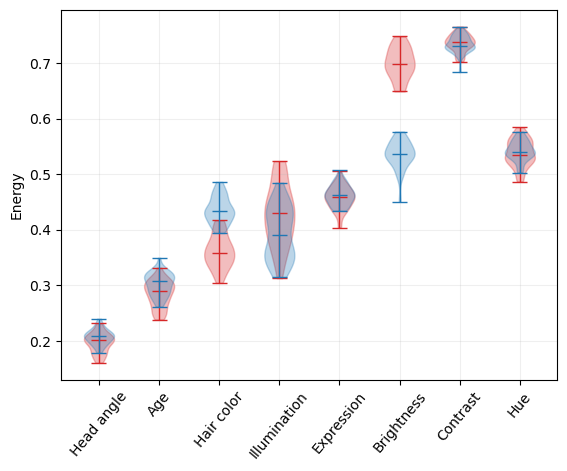

In [42]:
features = ["Head angle", "Age", "Hair color", "Illumination", "Expression"] + ['Brightness', 'Contrast', 'Hue']
frange = list(range(1,len(features)+1))

colors = ['tab:red','tab:blue','tab:green','tab:purple']

for i,finetuning in enumerate(list(energy_fine.keys())[:2]):  
    energy = np.array([energy_fine[finetuning][k] for k in features ]).T

    vlpt = plt.violinplot(energy, showmedians = True)
    c = colors[i]
    for pc in vlpt['bodies']:
        pc.set_facecolor(c)
        pc.set_edgecolor(c)

    for partname in ('cbars','cmins','cmaxes','cmedians'):
        vp = vlpt[partname]
        vp.set_edgecolor(c)
        vp.set_linewidth(1)

    plt.xticks(ticks=frange,labels = features, rotation = 50);
    plt.ylabel("Energy")
    #plt.title(finetunings[i])
    #plt.hlines(1,0.5,5.5,color = "black", label = "Random")

    plt.grid(alpha = 0.2)
